## Part 1 Data loading and and visualization

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

data = pd.read_csv('diabetes_scale.csv')
print(data.columns)

data.columns = ['outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']



Index(['outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [9]:
from sklearn.impute import SimpleImputer 

data.isnull().sum()
 
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = pd.DataFrame(imr.fit_transform(data), columns=data.columns)

print(imputed_data)


     Outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0        0.0    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1        1.0    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2        0.0    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3        1.0    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4        0.0    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   
..       ...          ...       ...            ...            ...       ...   
763      1.0     0.176471  0.015075       0.245902      -0.030303 -0.574468   
764      1.0    -0.764706  0.226131       0.147541      -0.454545 -1.000000   
765      1.0    -0.411765  0.216080       0.180328      -0.535354 -0.735225   
766      0.0    -0.882353  0.266332      -0.016393      -1.000000 -1.000000   
767      1.0    -0.882353 -0.065327       0.147541      -0.373737 -1.000000   

          BMI  DiabetesPedigreeFunction       Age  

In [15]:
data.isnull().sum()


outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         9
dtype: int64

In [14]:

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = pd.DataFrame(imr.fit_transform(data), columns=data.columns)

imputed_data['outcome'] = imputed_data['outcome'].replace(-1, 0)
imputed_data = imputed_data.rename(columns={'outcome': 'Outcome'})

print(imputed_data.head(16))


    Outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0       0.0    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1       1.0    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2       0.0    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3       1.0    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4       0.0    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   
5       1.0    -0.411765  0.165829       0.213115      -1.000000 -1.000000   
6       0.0    -0.647059 -0.216080      -0.180328      -0.353535 -0.791962   
7       1.0     0.176471  0.155779      -1.000000      -1.000000 -1.000000   
8       0.0    -0.764706  0.979899       0.147541      -0.090909  0.283688   
9       0.0    -0.058824  0.256281       0.573770      -1.000000 -1.000000   
10      1.0    -0.529412  0.105528       0.508197      -1.000000 -1.000000   
11      0.0     0.176471  0.688442       0.213115      -1.000000

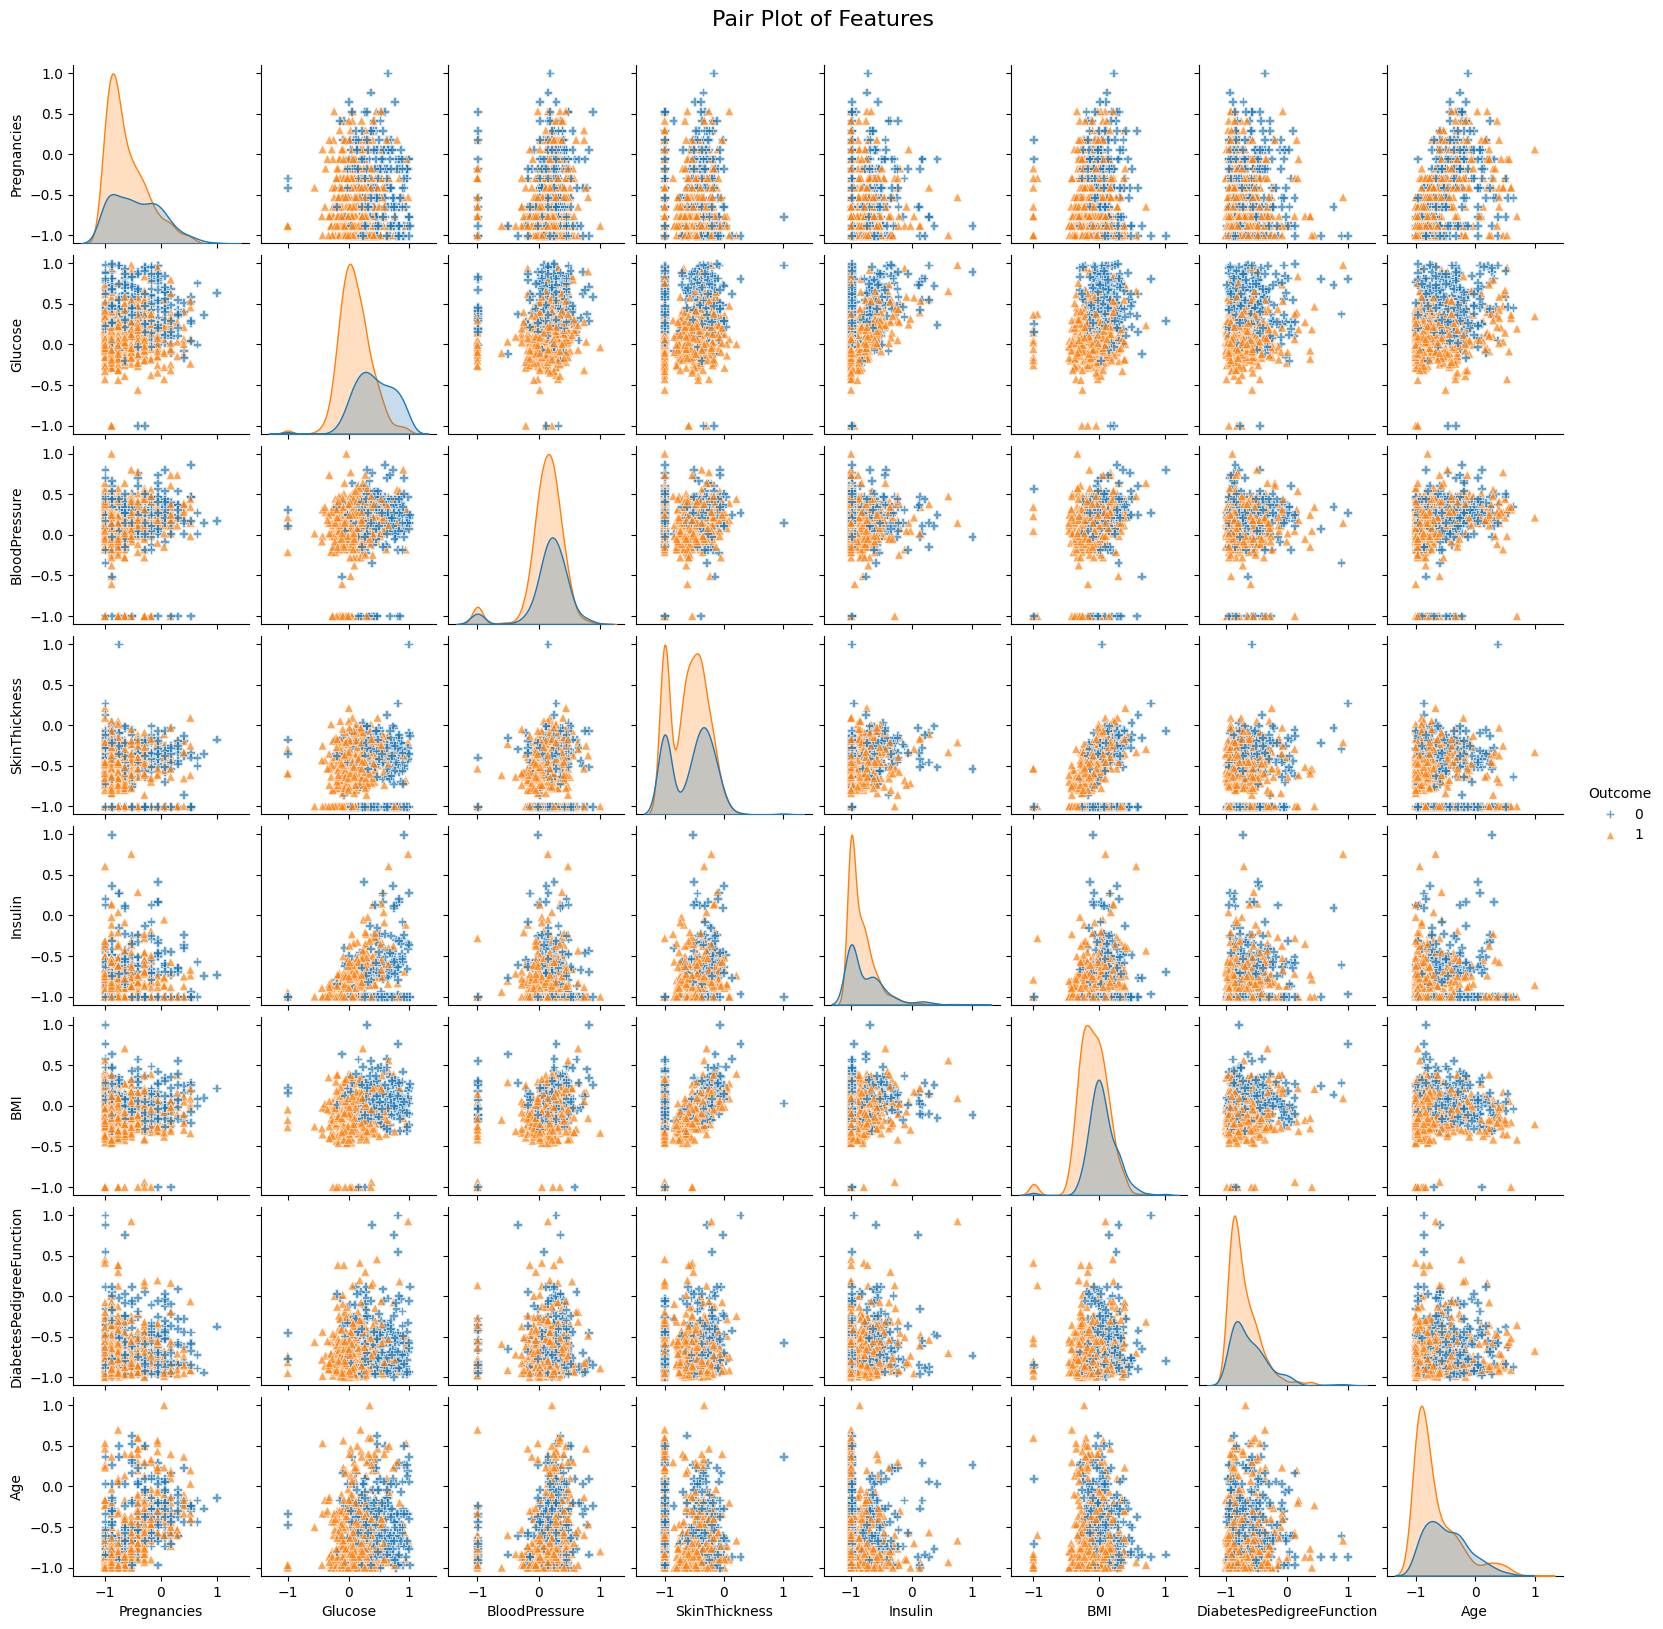

In [45]:
imputed_data['Outcome'] = imputed_data['Outcome'].apply(lambda x: int(float(x))).astype(str)

sns.pairplot(imputed_data, hue='Outcome', diag_kind='kde', markers=["P", "^"], 
             plot_kws={'alpha': 0.7, 's': 40}, height=2)

plt.suptitle('Pair Plot of Features', fontsize=16, y=1.02)


plt.show()

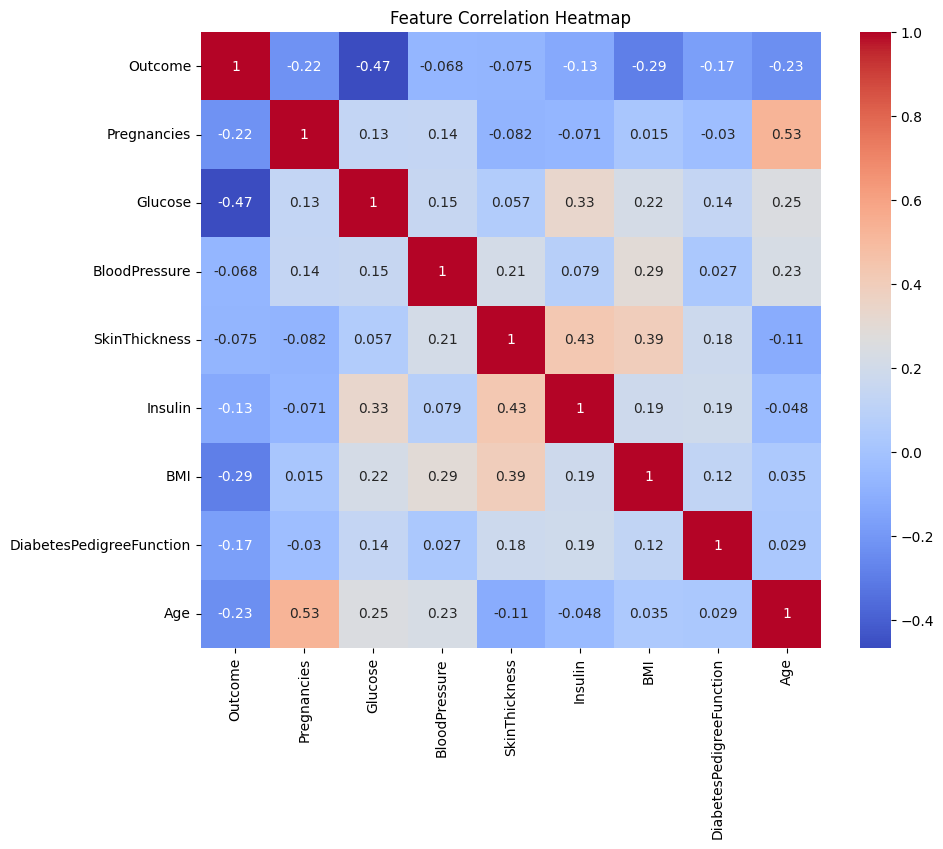

In [54]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

data = imputed_data  


X = data.drop(columns='Outcome')
y = data['Outcome'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(X_train)
mask = outliers != -1
X_train, y_train = X_train[mask, :], y_train[mask]


## part 2 Model training

Baseline Model Accuracy: 0.74
Confusion Matrix:
[[35 20]
 [20 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        55
           1       0.80      0.80      0.80        99

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



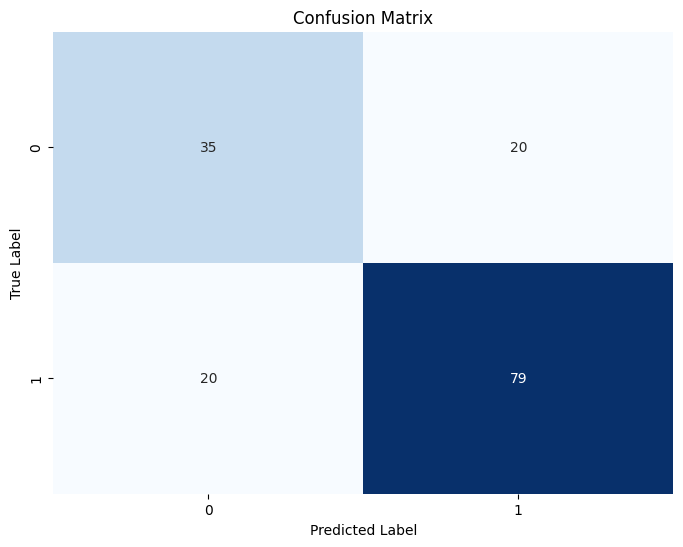

In [50]:

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline Model Accuracy: {accuracy:.2f}')


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

class Perceptron:
    # constructor
    def __init__ (self):
        self.w = None
        self.b = None

    # model
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0

    # predictor to predict on the data based on w
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs=100, lr=0.01):
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        accuracy = {}
        max_accuracy = 0
        
        for i in range(epochs):
            for x, y in zip(X, Y):
                x = np.array(x, dtype=float)  
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
            
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if accuracy[i] > max_accuracy:
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
        
        self.w = chkptw
        self.b = chkptb
        
        print("Max Accuracy", max_accuracy)
        
        plt.plot(list(accuracy.values()))
        plt.ylim([0, 1])
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Perceptron Training Accuracy')
        plt.show()

Max Accuracy 0.7703583061889251


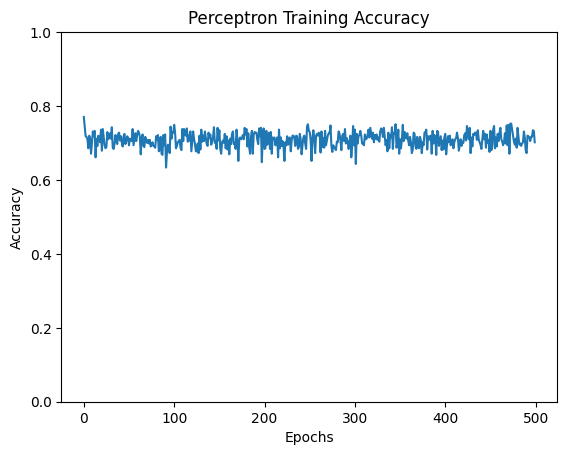

Perceptron Model Accuracy: 0.77
Confusion Matrix:
[[39 16]
 [20 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        55
           1       0.83      0.80      0.81        99

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



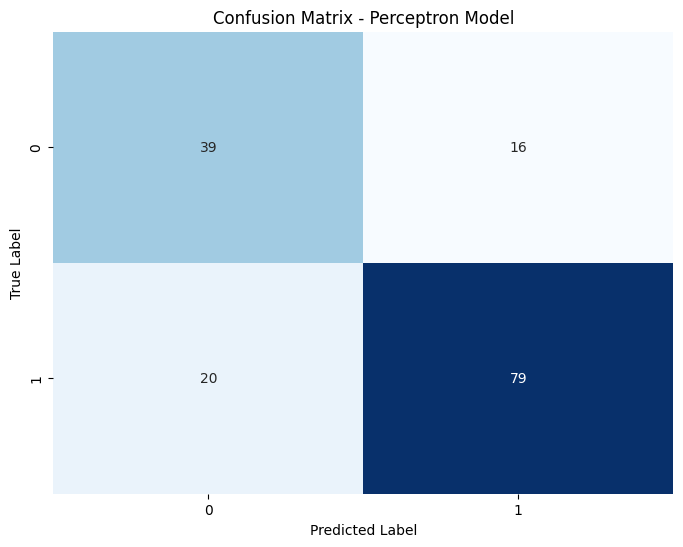

In [55]:


perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train, epochs=500, lr=0.01)

y_pred = perceptron_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Perceptron Model Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Perceptron Model')
plt.show()

## Part3 Hyperparameter Optimization

Max Accuracy 0.7801302931596091


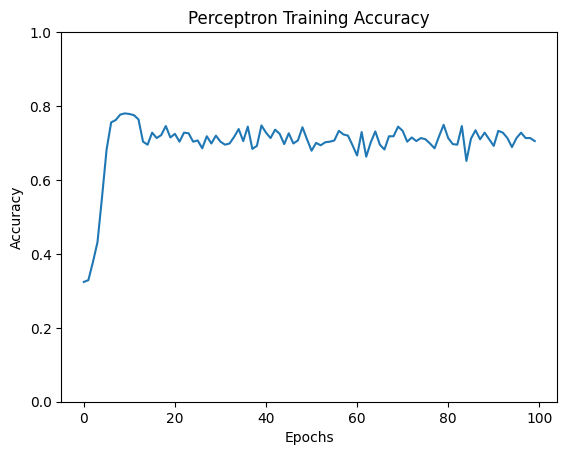

Max Accuracy 0.7801302931596091


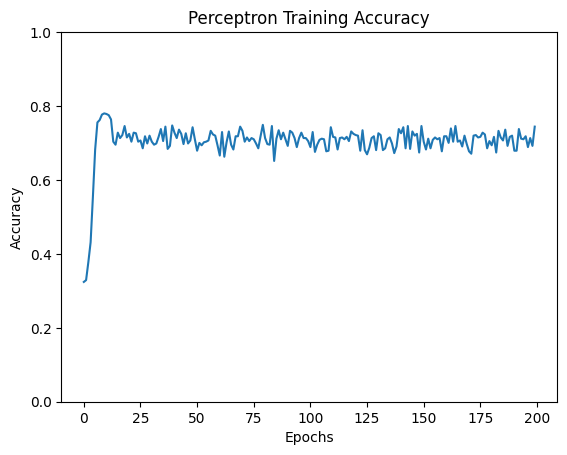

Max Accuracy 0.7801302931596091


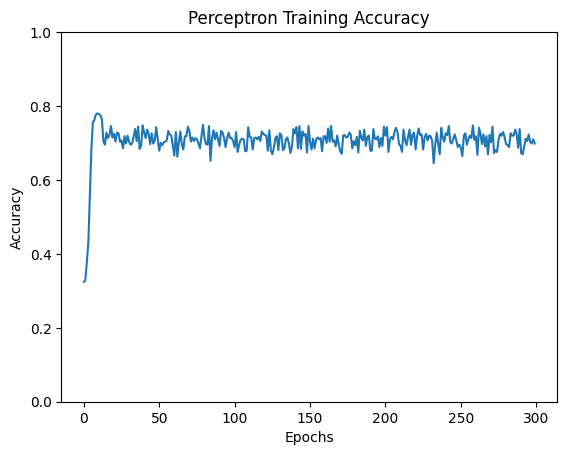

Max Accuracy 0.7801302931596091


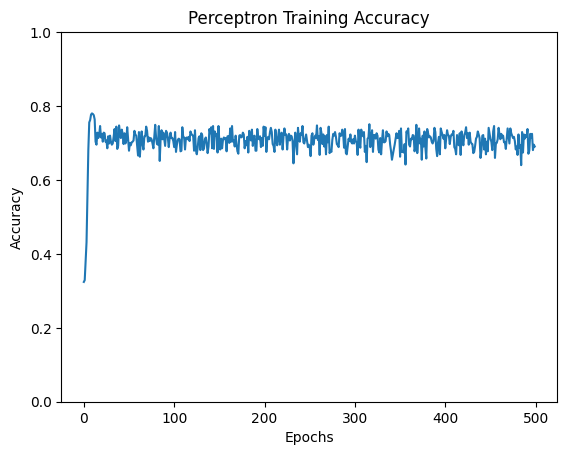

Max Accuracy 0.7703583061889251


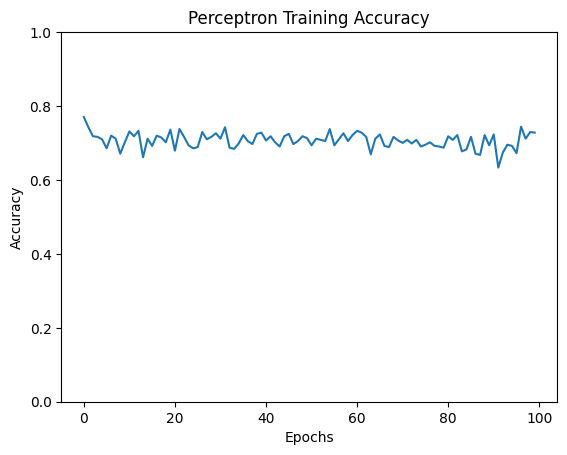

Max Accuracy 0.7703583061889251


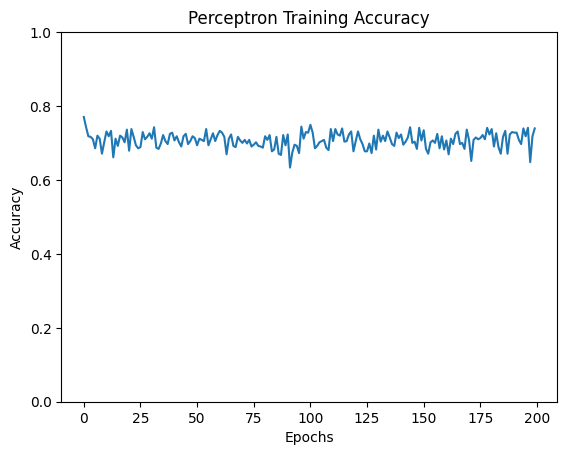

Max Accuracy 0.7703583061889251


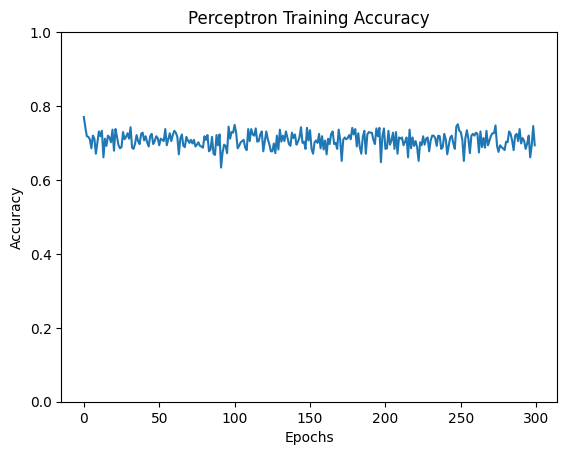

Max Accuracy 0.7703583061889251


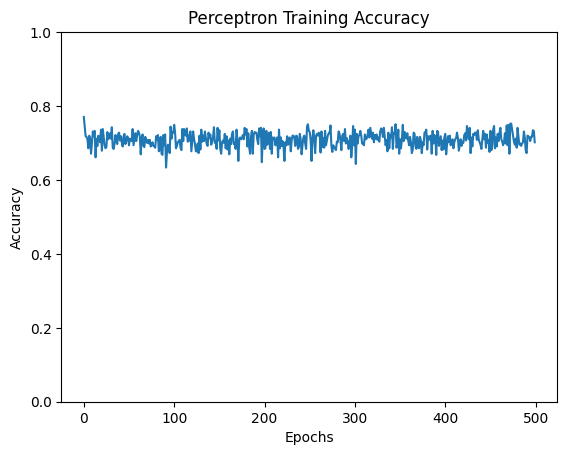

Max Accuracy 0.750814332247557


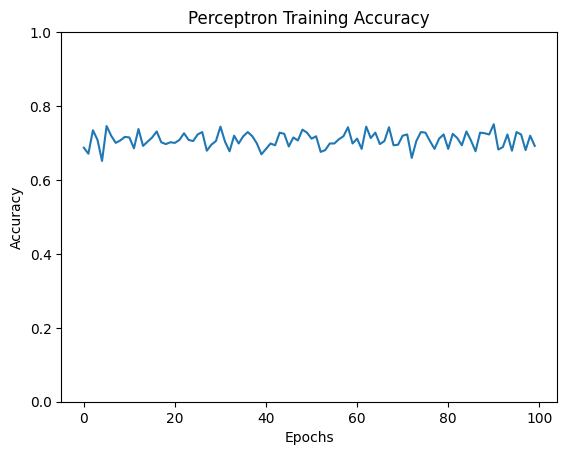

Max Accuracy 0.750814332247557


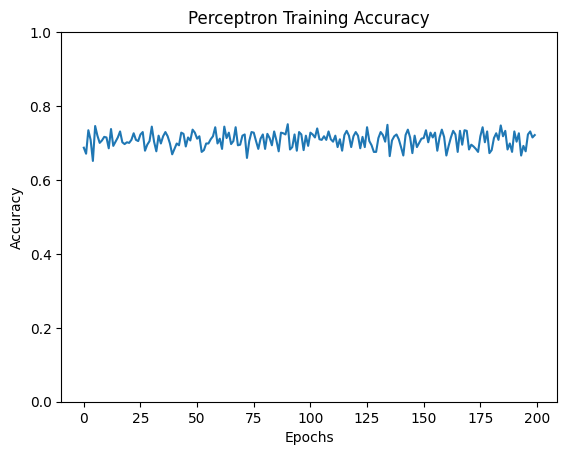

Max Accuracy 0.750814332247557


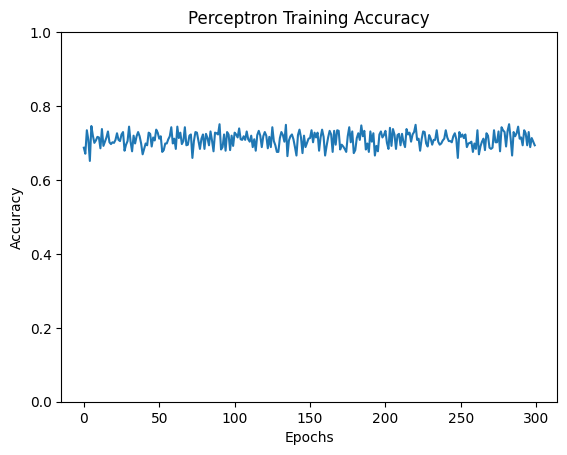

Max Accuracy 0.750814332247557


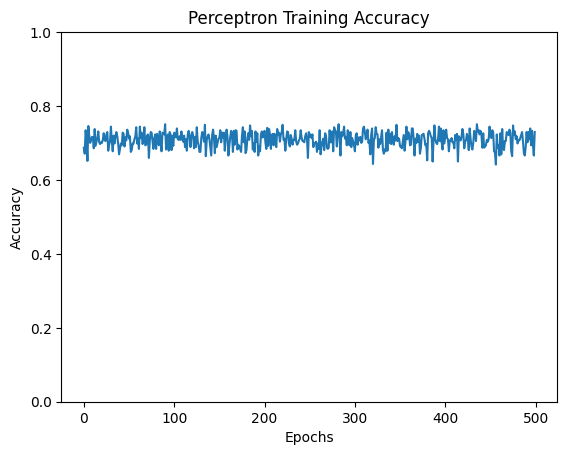

Max Accuracy 0.750814332247557


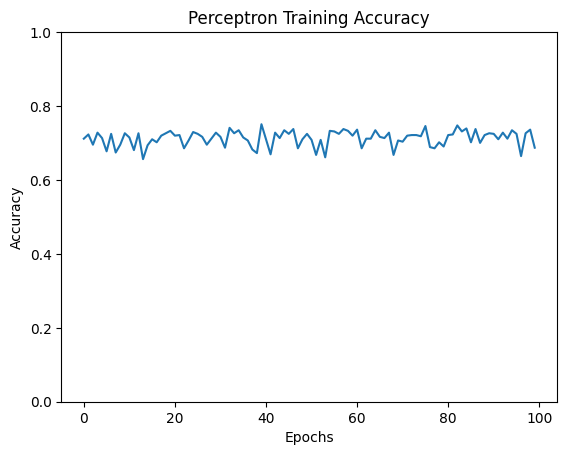

Max Accuracy 0.752442996742671


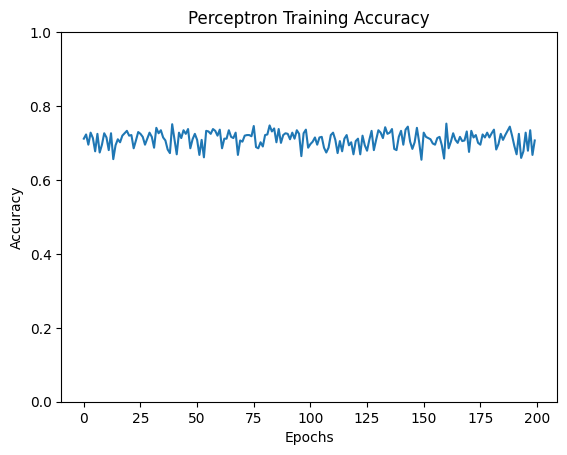

Max Accuracy 0.754071661237785


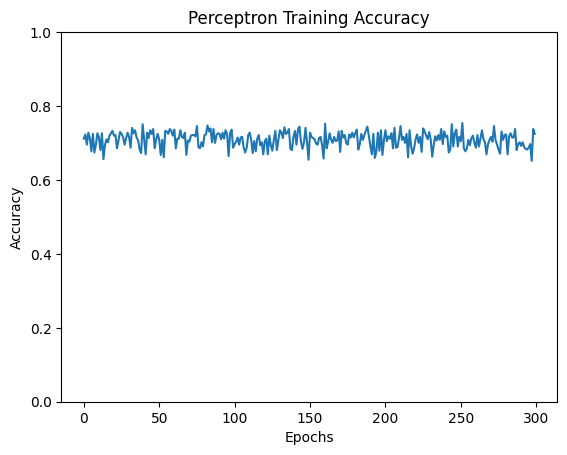

Max Accuracy 0.758957654723127


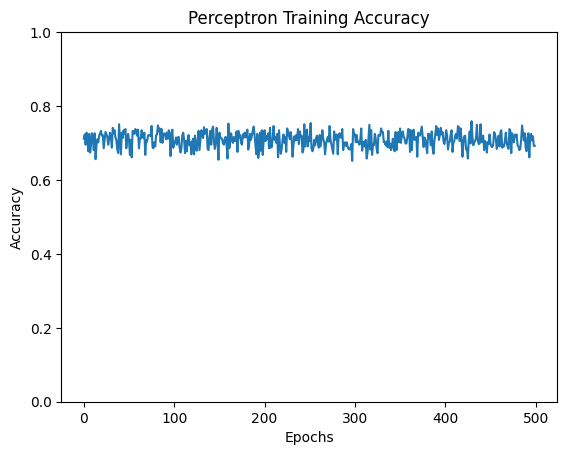

Max Accuracy 0.755700325732899


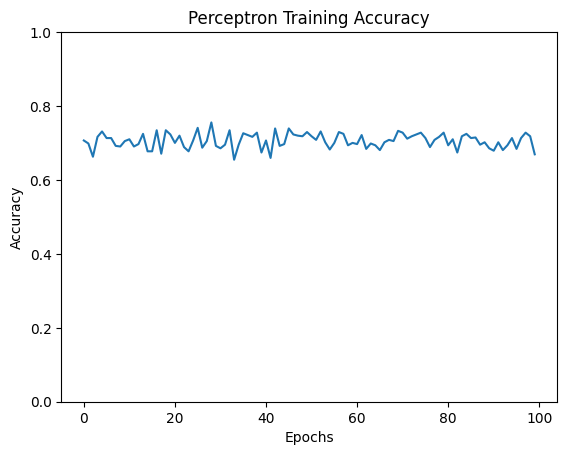

Max Accuracy 0.755700325732899


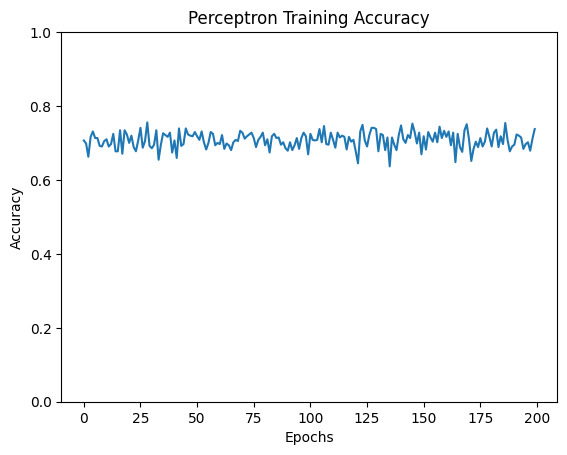

Max Accuracy 0.755700325732899


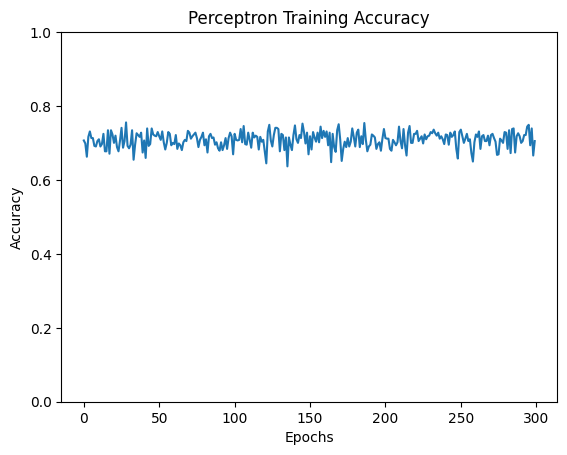

Max Accuracy 0.757328990228013


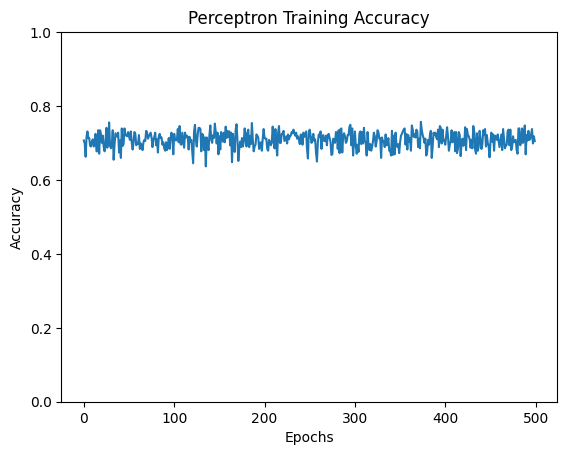

Max Accuracy 0.747557003257329


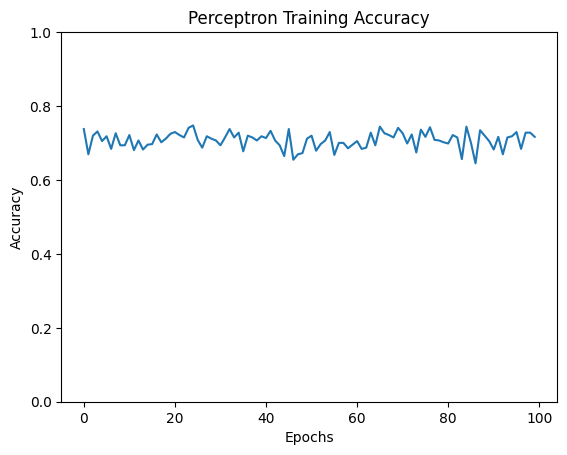

Max Accuracy 0.752442996742671


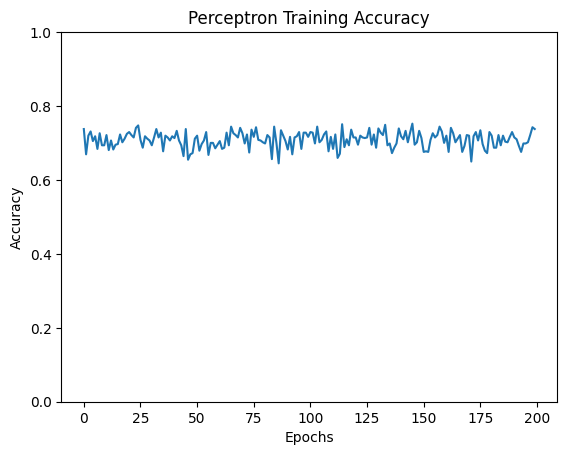

Max Accuracy 0.752442996742671


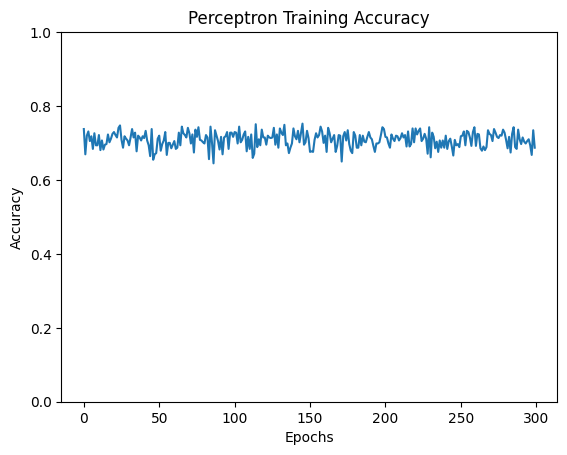

Max Accuracy 0.752442996742671


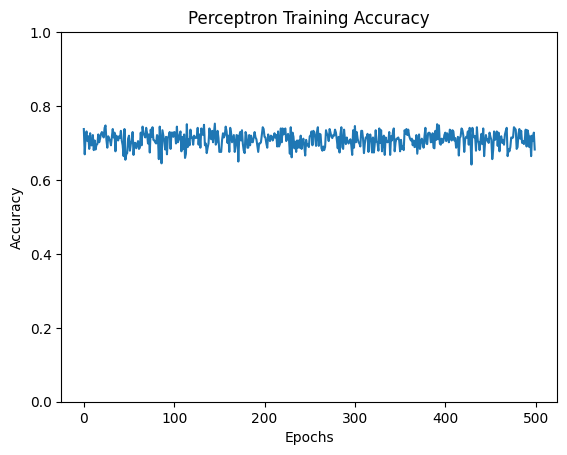

Best Parameters: {'learning_rate': 0.5, 'epochs': 100}
Best Accuracy: 0.84
Max Accuracy 0.755700325732899


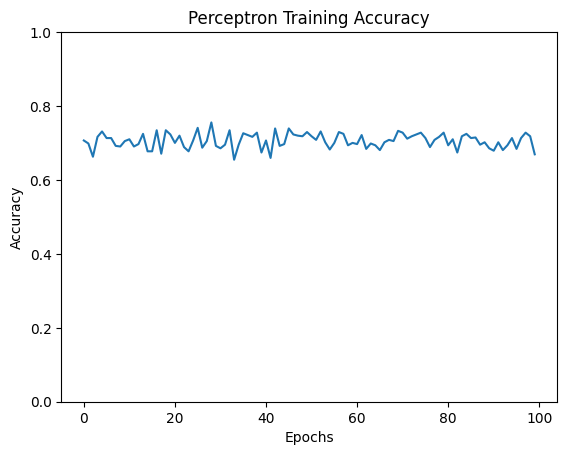

Perceptron Model Accuracy: 0.84
Confusion Matrix:
[[40 15]
 [10 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        55
           1       0.86      0.90      0.88        99

    accuracy                           0.84       154
   macro avg       0.83      0.81      0.82       154
weighted avg       0.84      0.84      0.84       154



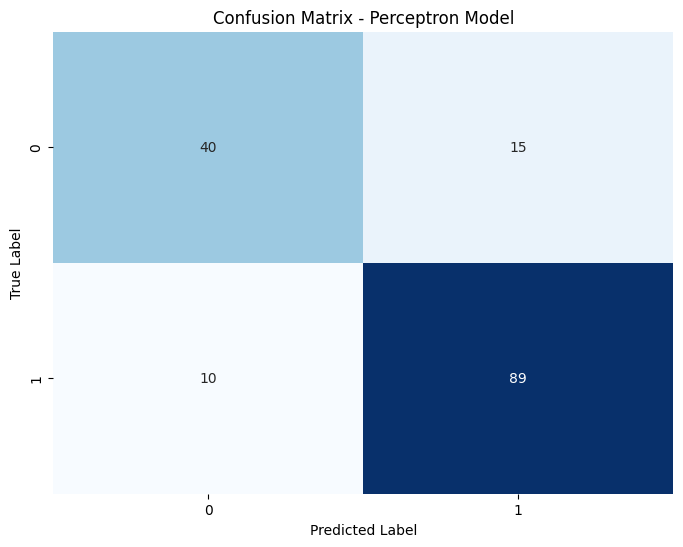

In [53]:
from sklearn.preprocessing import StandardScaler
# Hyperparameter Optimization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]
epochs_list = [100, 200, 300, 500]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for epochs in epochs_list:
        perceptron_model = Perceptron()
        perceptron_model.fit(X_train, y_train, epochs=epochs, lr=lr)
        y_pred = perceptron_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'learning_rate': lr, 'epochs': epochs}

print(f'Best Parameters: {best_params}')
print(f'Best Accuracy: {best_accuracy:.2f}')

perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train, epochs=best_params['epochs'], lr=best_params['learning_rate'])

y_pred = perceptron_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Perceptron Model Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Perceptron Model')
plt.show()
